https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [4]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
df2 = df1[['location','size','total_sqft','bath','balcony','price']]
df2.head(3)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00


**Handle NA values**

In [6]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
df2.total_sqft.isnull().sum()

0

In [8]:
df3 = df2[(df2['size'].notnull() & df2['location'].notnull())]
df3.isnull().sum()

location        0
size            0
total_sqft      0
bath           57
balcony       593
price           0
dtype: int64

In [9]:
df3.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [10]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [11]:
type(df3.total_sqft[0])

str

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,NaN,NaN,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,NaN,NaN,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2


In [14]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [15]:
df3.total_sqft = df3.total_sqft.apply(convert_sqft_to_num)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [16]:
df3[df3.total_sqft.isnull()]

,location,size,total_sqft,bath,balcony,price,bhk
410,Kengeri,1 BHK,NaN,1.0,0.0,18.50,1
648,Arekere,9 Bedroom,NaN,9.0,NaN,265.00,9
775,Basavanagara,1 BHK,NaN,2.0,1.0,93.00,1
872,Singapura Village,2 BHK,NaN,2.0,NaN,45.00,2
1019,Marathi Layout,1 Bedroom,NaN,1.0,0.0,110.00,1
1086,Narasapura,2 Bedroom,NaN,2.0,2.0,29.50,2
1400,Chamrajpet,9 BHK,NaN,9.0,1.0,296.00,9
1712,Singena Agrahara,3 Bedroom,NaN,3.0,1.0,95.00,3
1743,Hosa Road,3 BHK,NaN,3.0,1.0,115.00,3
1821,Sarjapur,3 Bedroom,NaN,3.0,1.0,76.00,3


In [17]:
df4 = df3[~(df3.total_sqft.isnull())]
df4.total_sqft.isnull().sum()

0

<h2 style="color:purple">Clean up data using price per square feet</h2>

**Find out price per square feet**

In [18]:
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [19]:
df4['price_per_sqft'].describe()

count    1.325700e+04
mean     7.912825e+03
std      1.064976e+05
min      2.678298e+02
25%      4.271186e+03
50%      5.438596e+03
75%      7.313318e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [20]:
max_price_per_sqft = int(max(df4['price_per_sqft']))
b = range(0,max_price_per_sqft,10000)

(array([11439.,  1544.,   225., ...,     0.,     0.,     0.]),
 array([       0,    10000,    20000, ..., 11970000, 11980000, 11990000]),
 <a list of 1199 Patch objects>)

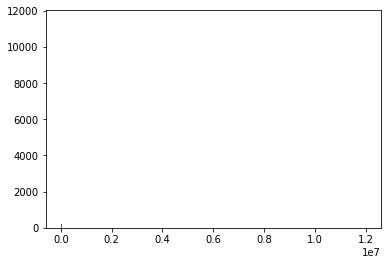

In [21]:
plt.hist(df4.price_per_sqft,bins=b)

**Use log scale for better viewing of the chart**

(array([11439.,  1544.,   225., ...,     0.,     0.,     0.]),
 array([       0,    10000,    20000, ..., 11970000, 11980000, 11990000]),
 <a list of 1199 Patch objects>)

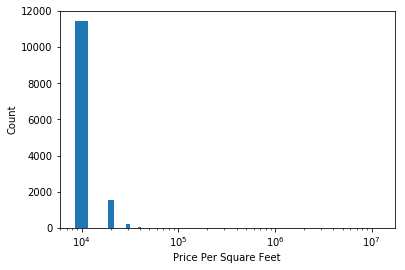

In [22]:
plt.xscale('log')
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')
plt.hist(df4.price_per_sqft,bins=b, rwidth=0.3,align='right')

**Based on above chart it looks like we should exclude anything that has price_per_sqft > 10000. But before excluding them
let's eyeball those data points that are going to be excluded**

In [23]:
df4[df4.price_per_sqft>10000]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,NaN,600.0,4,18181.818182
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,NaN,370.0,6,36274.509804
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.0,4,10592.459605
18,Ramakrishnappa Layout,3 BHK,2770.0,4.0,2.0,290.0,3,10469.314079
22,Thanisandra,4 Bedroom,2800.0,5.0,2.0,380.0,4,13571.428571
45,HSR Layout,8 Bedroom,600.0,9.0,NaN,200.0,8,33333.333333
48,KR Puram,2 Bedroom,800.0,1.0,1.0,130.0,2,16250.000000
57,Ramakrishnappa Layout,2 BHK,1500.0,2.0,2.0,185.0,2,12333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
62,Whitefield,4 Bedroom,5700.0,5.0,3.0,650.0,4,11403.508772


**As a data scientist you will give this report to your business manager for verification. Business manager might say that 4 BHK flat in Rajaji nagar with 6 crore price seems ok and should not be removed. Now you change your criteria further to exclude properties with price_per_sqft < 20000**

In [24]:
df4[df4.price_per_sqft>20000]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Gandhi Bazar,6 Bedroom,1020.00,6.0,NaN,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.00,9.0,NaN,200.0,8,33333.333333
89,Rajaji Nagar,6 Bedroom,710.00,6.0,3.0,160.0,6,22535.211268
159,Mahalakshmi Layout,4 Bedroom,3750.00,4.0,0.0,760.0,4,20266.666667
192,Bellandur,4 Bedroom,1200.00,5.0,NaN,325.0,4,27083.333333
349,Suragajakkanahalli,3 Bedroom,11.00,3.0,2.0,74.0,3,672727.272727
413,Mahalakshmi Layout,6 Bedroom,1200.00,7.0,3.0,250.0,6,20833.333333
434,7th Phase JP Nagar,8 Bedroom,1200.00,8.0,NaN,250.0,8,20833.333333
480,RMV 2nd Stage,4 BHK,1150.00,4.0,2.0,260.0,4,22608.695652
743,Cunningham Road,4 BHK,5270.00,4.0,3.0,1250.0,4,23719.165085


(array([   9.,   21.,  496., 1955., 2935., 2519., 1636., 1003.,  556.,
         309.,  346.,  224.,  212.,  176.,  132.,  150.,  120.,   71.,
          71.]),
 array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
         9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000,
        18000, 19000]),
 <a list of 19 Patch objects>)

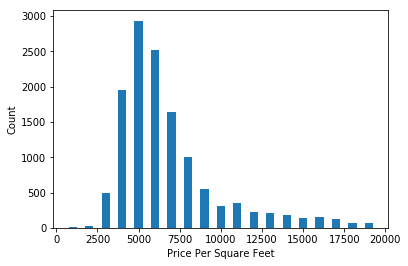

In [25]:
df5 = df4[~(df4.price_per_sqft>20000)]
max_price_per_sqft = int(max(df5['price_per_sqft']))
b = range(0,max_price_per_sqft,1000)

plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')
plt.hist(df5.price_per_sqft,bins=b, rwidth=0.5,align='right')

**Your business manager tells you that on the lower side, anything less than 2000 rs per square ft looks suspicious. He asks you to give report of such properties and you generate it as show below**

In [26]:
df5[df5.price_per_sqft<2000]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
132,Electronic City,2 BHK,880.0,1.0,1.0,16.5,2,1875.000000
514,Banashankari Stage III,4 Bedroom,8500.0,4.0,2.0,145.0,4,1705.882353
674,Yelahanka,3 BHK,35000.0,3.0,3.0,130.0,3,371.428571
810,4 Bedroom Farm House in Bagalur,4 Bedroom,10961.0,4.0,1.0,80.0,4,729.860414
996,Chikkabanavar,1 Bedroom,1200.0,1.0,0.0,20.0,1,1666.666667
1894,Nelamangala,3 Bedroom,52272.0,2.0,1.0,140.0,3,267.829813
2404,Yelahanka New Town,1 BHK,960.0,2.0,1.0,18.0,1,1875.000000
2421,Basavanagara,4 Bedroom,2000.0,3.0,2.0,25.0,4,1250.000000
3976,Chikkathoguru,1 BHK,1500.0,1.0,1.0,19.5,1,1300.000000
4105,Indranagar 100ft road defence colony,5 BHK,5800.0,5.0,NaN,80.0,5,1379.310345


In [27]:
df6 = df5[~(df5.price_per_sqft<2000)]
df6.shape

(12991, 8)

<h2 style="color:purple">Lets check BHK feature now</h2>

(array([0.000e+00, 6.270e+02, 5.504e+03, 4.811e+03, 1.307e+03, 3.160e+02,
        1.960e+02, 9.200e+01, 7.400e+01, 4.300e+01, 1.100e+01, 4.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 26 Patch objects>)

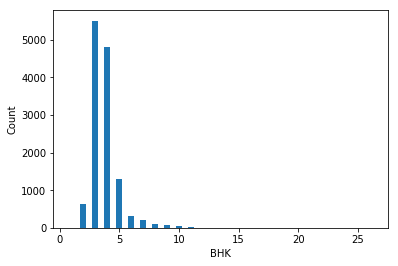

In [28]:
plt.xlabel('BHK')
plt.ylabel('Count')
plt.hist(df6.bhk,bins=range(0,max(df6.bhk)), rwidth=0.5, align='right')

In [29]:
df6[df6.bhk>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
459,1 Giri Nagar,11 BHK,5000.0,9.0,3.0,360.0,11,7200.000000
1718,2Electronic City Phase II,27 BHK,8000.0,27.0,0.0,230.0,27,2875.000000
1768,1 Ramamurthy Nagar,11 Bedroom,1200.0,11.0,0.0,170.0,11,14166.666667
3609,Koramangala Industrial Layout,16 BHK,10000.0,16.0,NaN,550.0,16,5500.000000
3853,1 Annasandrapalya,11 Bedroom,1200.0,6.0,3.0,150.0,11,12500.000000
4916,1Channasandra,14 BHK,1250.0,15.0,0.0,125.0,14,10000.000000
6533,Mysore Road,12 Bedroom,2232.0,6.0,2.0,300.0,12,13440.860215
7979,1 Immadihalli,11 BHK,6000.0,12.0,NaN,150.0,11,2500.000000
9935,1Hoysalanagar,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424
11559,1Kasavanhalli,18 Bedroom,1200.0,18.0,NaN,200.0,18,16666.666667


**Your business manager who is real estate expert tells you that general norm is to have 3 BHK per 1000 square ft. Based on thiis criteria you can detect outliers in that dataset**

In [121]:
df6[(df6.total_sqft/df6.bhk)<(1000/3)].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
26,Electronic City,2 BHK,660.0,1.0,1.0,23.1,2,3500.000000
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Double Road,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696


In [122]:
df7 = df6[~((df6.total_sqft/df6.bhk)<(1000/3))]

In [123]:
df7.shape

(12080, 8)

<h2 style="color:purple">Location is a categorical variable. We need to do some dimensionality reduction here</h2>

In [124]:
locstats = df7.groupby('location')['location'].agg('count')

In [113]:
df7.shape

(12080, 9)

In [118]:
locstats[(locstats<10)]

location
 Anekal                                            1
 Banaswadi                                         1
 Basavangudi                                       1
 Devarabeesana Halli                               6
 Electronic City                                   2
 Mysore Highway                                    4
 Rachenahalli                                      2
 Sector 1 HSR Layout                               1
 Thanisandra                                       3
 Whitefield                                        1
 south                                             2
1 Giri Nagar                                       1
1 Immadihalli                                      1
12th cross srinivas nagar banshankari 3rd stage    1
1Hoysalanagar                                      1
1st Block BEL Layout                               2
1st Block HBR Layout                               3
1st Block HRBR Layout                              3
1st Block Koramangala                

In [145]:
other_locations = locstats[(locstats<=10)]
np.sum(other_locations.values)

2597

In [146]:
df7.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [299]:
df8 = df7.copy()
df8.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [301]:
df8.location = df8.location.apply(lambda x: 'other' if x in other_locations.index else x)

In [300]:
df8.shape

(12080, 8)

<h2 style='color:purple'>Handle bathrooms feature</h2>

In [302]:
df8.bath.isnull().sum()

57

In [303]:
df9 = df8[df8.bath.notnull()]
df9.bath.isnull().sum()

0

In [304]:
df9.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  6.,  7.,  9., 14., 12., 16., 10.,
       13.])

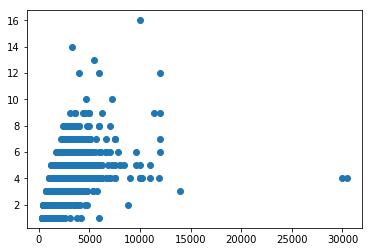

In [305]:
plt.scatter(df9.total_sqft,df9.bath)

In [306]:
df9[(df9.total_sqft/df9.bath) < (1000/3) ].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
84,EPIP Zone,3 BHK,1499.0,5.0,2.0,102.0,3,6804.536358
209,Padmanabhanagar,4 Bedroom,1736.0,6.0,0.0,190.0,4,10944.700461
439,Kasavanhalli,3 Bedroom,1000.0,4.0,3.0,110.0,3,11000.000000
504,other,1 BHK,375.0,2.0,0.0,26.0,1,6933.333333
603,other,3 Bedroom,1125.0,4.0,1.0,70.0,3,6222.222222


In [307]:
df10 = df9[~((df9.total_sqft/df9.bath) < (1000/3)) ]
df10.shape

(11962, 8)

In [308]:
df10.location = df10.location.apply(lambda x: x.strip())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [309]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [310]:
df11 = pd.concat([df10,dummies],axis='columns')

In [311]:
df11.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [312]:
df12 = df11.drop(['location','size','balcony','price_per_sqft'],axis='columns')

In [313]:
df12.shape

(11962, 219)

In [314]:
df12.head()

,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [315]:
df12.columns

Index(['total_sqft', 'bath', 'price', 'bhk', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar',
       ...
       'Vidyaranyapura', 'Vijayanagar', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'],
      dtype='object', length=219)

In [175]:
dftemp = df12[(df12.bhk==2) & (df12.bath==2) & (df12.Devarachikkanahalli==1)]

In [176]:
dftemp.head()

,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
341,1250.0,2.0,40.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2474,1200.0,2.0,83.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5030,1170.0,2.0,40.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6591,947.0,2.0,43.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7536,1130.0,2.0,36.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


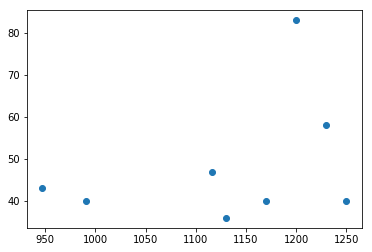

In [177]:
plt.scatter(dftemp.total_sqft,dftemp.price)

<h2 style='color:purple'>Build a model now</h2>

In [316]:
X = df12.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [319]:
X.shape

(11962, 218)

In [317]:
y = df12.price
y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [318]:
len(y)

11962

In [320]:
from sklearn.model_selection import train_test_split

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [322]:
len(X_train)

9569

In [323]:
len(X_test)

2393

In [328]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)

In [329]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [330]:
model.score(X_test,y_test)

0.7194337705573254

In [331]:
model.coef_

array([ 9.03541415e-02,  1.17515647e+01, -1.18367520e+01, -7.31753429e+13,
       -7.31753429e+13, -7.31753429e+13, -7.31753429e+13, -7.31753429e+13,
       -7.31753429e+13, -7.31753429e+13, -7.31753429e+13, -7.31753429e+13,
       -7.31753429e+13, -7.31753429e+13, -7.31753429e+13, -7.31753429e+13,
       -7.31753429e+13, -7.31753429e+13, -7.31753429e+13, -7.31753429e+13,
       -7.31753429e+13, -7.31753429e+13, -7.31753429e+13, -7.31753429e+13,
       -7.31753429e+13, -7.31753429e+13, -7.31753429e+13, -7.31753429e+13,
       -7.31753429e+13, -7.31753429e+13, -7.31753429e+13, -7.31753429e+13,
       -7.31753429e+13, -7.31753429e+13, -7.31753429e+13, -7.31753429e+13,
       -7.31753429e+13, -7.31753429e+13, -7.31753429e+13, -7.31753429e+13,
       -7.31753429e+13, -7.31753429e+13, -7.31753429e+13, -7.31753429e+13,
       -7.31753429e+13, -7.31753429e+13, -7.31753429e+13, -7.31753429e+13,
       -7.31753429e+13, -7.31753429e+13, -7.31753429e+13, -7.31753429e+13,
       -7.31753429e+13, -

In [276]:
X_test.head(10)

,total_sqft,bath,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
9236,865.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1156,1330.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5846,1374.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9041,1476.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13312,1262.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4797,1145.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9232,1170.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6884,1480.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9090,1308.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11818,1835.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [277]:
y_test[:10]

9236      40.00
1156      92.50
5846      51.00
9041     105.00
13312     47.00
4797      62.00
9232      44.00
6884      75.48
9090      75.00
11818     88.00
Name: price, dtype: float64

In [278]:
model.predict(X_test[:10])

array([ 27.90430832,  65.82487869,  78.92528534,  81.11387253,
        70.51164627,  63.76470566,  55.13161087,  97.91679382,
        79.79195786, 129.15930557])

<h2 style='color:purple'>Use K-Fold cross validation to measure score of a model</h2>

In [261]:
from sklearn.model_selection import cross_val_score

In [288]:
cross_val_score(LinearRegression(), X,y,cv=5)

array([0.77953777, 0.71894875, 0.77232172, 0.74486394, 0.74419506])

In [280]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [287]:
cross_val_score(LinearRegression(), X,y,cv=5)

array([0.77953777, 0.71894875, 0.77232172, 0.74486394, 0.74419506])

**If this was a classification problem, we could have used different classification algorithms and GridSearchCV to come up with best algorithm and best hyperparameters**

In [263]:
X_test.head(10)

,total_sqft,bath,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
9236,865.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1156,1330.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5846,1374.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9041,1476.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13312,1262.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4797,1145.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9232,1170.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6884,1480.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9090,1308.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11818,1835.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [264]:
y_test.head(10)

9236      40.00
1156      92.50
5846      51.00
9041     105.00
13312     47.00
4797      62.00
9232      44.00
6884      75.48
9090      75.00
11818     88.00
Name: price, dtype: float64

In [265]:
model.predict(X_test[:10])

array([ 27.90430832,  65.82487869,  78.92528534,  81.11387253,
        70.51164627,  63.76470566,  55.13161087,  97.91679382,
        79.79195786, 129.15930557])

In [266]:
x_cols = X.columns
x_cols

Index(['total_sqft', 'bath', 'bhk', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       ...
       'Vasanthapura', 'Vidyaranyapura', 'Vijayanagar', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=217)

In [267]:
loc = '1st Phase JP Nagar'
loc_index = np.where(x_cols==loc)[0][0]
loc_index

3

In [268]:
x1 = np.zeros(len(x_cols))
x1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [269]:
x1[0] = 1000 # total sqft
x1[1] = 2 # bath
x1[2] = 2 # bhk
x1[loc_index] = 1 # set correct column for location

In [291]:
x2 = np.zeros(len(x_cols))
x2[0] = 1000
x2[1] = 3 # bath
x2[2] = 3 # bhk
x2[loc_index] = 1

In [271]:
x2

array([1000.,    3.,    3.,    1.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

In [292]:
model.predict([x1,x2])

array([73.96646118, 66.61022186])

In [273]:
model.coef_

array([ 9.83267049e-02,  5.20586955e+00, -1.25621056e+01,  2.42395448e+10,
        2.42395448e+10,  2.42395448e+10,  2.42395448e+10,  2.42395448e+10,
        2.42395448e+10,  2.42395448e+10,  2.42395448e+10,  2.42395448e+10,
        2.42395448e+10,  2.42395448e+10,  2.42395448e+10,  2.42395448e+10,
        2.42395448e+10,  2.42395448e+10,  2.42395448e+10,  2.42395448e+10,
        2.42395448e+10,  2.42395448e+10,  2.42395448e+10,  2.42395448e+10,
        2.42395448e+10,  2.42395448e+10,  2.42395448e+10,  2.42395448e+10,
        2.42395448e+10,  2.42395448e+10,  2.42395449e+10,  2.42395448e+10,
        2.42395447e+10,  2.42395448e+10,  2.42395448e+10,  2.42395448e+10,
        2.42395448e+10,  2.42395448e+10,  2.42395448e+10,  2.42395448e+10,
        2.42395448e+10,  2.42395448e+10,  2.42395449e+10,  2.42395448e+10,
        2.42395448e+10,  2.42395448e+10,  2.42395448e+10,  2.42395448e+10,
        2.42395448e+10,  2.42395448e+10,  2.42395448e+10,  2.42395448e+10,
        2.42395448e+10,  

<h2 style='color:purple'>Export trained model and other artifacts</h2>

In [89]:
import pickle

with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

In [90]:
tier_df.head()

,tier1,tier2,tier3,tier4,tier5,tier6,tier
location,,,,,,,
Electronic City Phase II,100,23,0,0,0,0,tier1
Chikka Tirupathi,12,5,0,0,0,0,tier1
Uttarahalli,157,20,1,0,0,0,tier1
Lingadheeranahalli,1,21,1,0,0,0,tier2
Kothanur,39,21,2,0,1,0,tier1


In [91]:
tier_df[['tier']].head()

,tier
location,
Electronic City Phase II,tier1
Chikka Tirupathi,tier1
Uttarahalli,tier1
Lingadheeranahalli,tier2
Kothanur,tier1


In [92]:
tier_df.index = tier_df.index.str.lower()

In [93]:
with open('location_tiers.pickle','wb') as f:
    pickle.dump(tier_df[['tier']],f)